In [1]:
# IMPORT STATEMENTS
import cv2
import re
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math
get_ipython().magic('matplotlib inline')
import pandas as pd
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path
sys.path.append("/booleanfs2/sahoo/Data/Macrophage/BN/")
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

import bone
reload(bone)

/tmp/ipykernel_55573/89994931.py:11: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('matplotlib inline')


<module 'bone' from '/booleanfs2/sahoo/BoNE/bone.py'>

In [4]:
import bone
reload(bone)

class CRCDiffAnalysis(bone.IBDAnalysis):

    def __init__(self):
        bone.IBDAnalysis.__init__(self)

    def getColonGEOPurged(self, tn=1, ta=0, tb=0):
        self.prepareData("CRC145")
        atype = self.h.getSurvName('c Histology')
        atypes = ['N', 'A', 'C']
        ahash = {'Normal':0, 'Adenoma':1, 'Carcinoma':2}
        if (tn == 2):
            atypes = ['N', 'C']
            ahash = {'Normal':0, 'Carcinoma':1}
        self.initData(atype, atypes, ahash)
        return
    
    def getDingBilladeau2022(self, tn=1, ta=0, tb=0):
        self.prepareData("GL45", cfile="/Users/ssaha/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c title')
        atype = [str(k).split("_")[1] if len(str(k).split("_")) > 2 else None for k in atype]
        atypes = ['WT', 'NGC', 'KC', 'KNGC']
        ahash = {}
        self.initData(atype, atypes, ahash)
        return

    def getHiraokaYamazaki2010(self, tn=1, ta=0, tb=0):
        self.prepareData("GL46", cfile="/Users/ssaha/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c title')
        atype = [str(k).split(" ")[0] for k in atype]
        atypes = ['C', 'mA', 'mC', 'mN']
        ahash = {'normal':0, 'IPMA':1, 'IPMC':2, 'Invasive':3}
        if (tn == 2):
            atypes = ['mA', 'mN']
            ahash = {'IPMA':0, 'Invasive cancer':1}
        self.initData(atype, atypes, ahash)
        return
    
    def getPermuthWeyChen2015(self, tn=1, ta=0, tb=0):
        self.prepareData("GL47", cfile="/Users/ssaha/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c risk (ch1)')
        atypes = ['Low', 'High']
        ahash = {'Low-risk IPMN tissue':0, 'High-risk IPMN tissue':1}
        self.initData(atype, atypes, ahash)
        return

    def getLiffersGodfrey2022(self, tn=1, ta=0, tb=0):
        self.prepareData("GL48", cfile="/Users/ssaha/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c type (ch1)')
        atypes = ['bulk acinus', 'PanIN', 'gIPMN', 'iIPMN', 'PDAC']
        ahash = {}
        if (tn == 2):
            atypes = ['IPMN', 'PDAC']
            ahash = {'gIPMN':0, 'iIPMN':0, 'PDAC':1}
        self.initData(atype, atypes, ahash)
        return

    def getTomitaTanaka2019(self, tn=1, ta=0, tb=0):
        self.prepareData("GL49", cfile="/Users/ssaha/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c agent (ch1)')
        atypes = ['Water', 'Dox']
        ahash = {'Doxycycline':1, 'water':0}
        self.initData(atype, atypes, ahash)
        return

    def getGao2022(self, tn=1, ta=0, tb=0):
        self.prepareData("GL50", cfile="/Users/ssaha/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c source_name (ch1)')
        atypes = ['N', 'IPMN', 'PDAC', 'NEN', 'ACC']
        ahash = {'PDAC organoid':2, 'IPMN organoid':1, 'NEN organoid':3, 'ACC organoid':4,
                 'Normal pancreatic ductal organoid':0}
        self.initData(atype, atypes, ahash)
        return

    def getZhao2021(self, tn=1, ta=0, tb=0):
        self.prepareData("GL51", cfile="/Users/ssaha/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c title')
        atypes = ['N', 'IPMN', 'PASC']
        ahash = {'Sample 3_normal pancreas_ZX-4':0, 'Sample 2_PASC_ZX-3':2,
                 'Sample 1_IPMN_ZX-2':1}
        self.initData(atype, atypes, ahash)
        return
    
    def getYangQin2022(self):
        self.prepareData("BL01",cfile="/Users/ssaha/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c tissue type (ch1)')
        atypes = ['normal gallbladder','gallbladder with chronic inflammation induced by gallstones','gallbladder adenoma','early gallbladder cancer','advanced gallbladder cancer']
        self.labels = ['N','I','A','EC','AC']
        ahash = {'normal gallbladder':0,'gallbladder with chronic inflammation induced by gallstones':1,'gallbladder adenoma':2,'early gallbladder cancer':3,'advanced gallbladder cancer':4}
        self.initData(atype, atypes, ahash)
        return

    def getXuWang2019(self):
        self.prepareData("BL02",cfile="/Users/ssaha/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c tissue (ch1)')
        atypes = ['normal gallbladder', 'gallbladder tumor']
        self.labels = ['N','T']
        ahash = {'normal gallbladder':0, 'gallbladder tumor':1}
        self.initData(atype, atypes, ahash)
        return

    def getHoshidaSia2015(self):
        self.prepareData("BL03",cfile="/Users/ssaha/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c nmf.subclass (ch1)')
        atypes = ['Inflammation', 'Proliferation']
        self.labels = ['I','P']
        ahash = {'Inflammation':0, 'Proliferation':1}
        self.initData(atype, atypes, ahash)
        return

    def getAndersonSpree2013(self, tn=1):
        self.prepareData("BL04",cfile="/Users/ssaha/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c tissue (ch1)')
        atypes = ['L','D', 'C']
        ahash = {'Surrounding liver':0, 'Cholangiocarcinoma':1,
                 'Normal intrahepatic bile duct':2}
        if tn == 2:
            atypes = ['C']
            ahash = {'Cholangiocarcinoma':0}
        self.initData(atype, atypes, ahash)
        return

    def getPirenneSaandi2021(self, tn=1, ta=0):
        self.prepareData("BL05",cfile="/Users/ssaha/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c group (ch1)')        
        atypes = ['DP','IP','IC','FACS']
        ahash = {'Ductular proliferations':0,
                 'intraductal papillary neoplasm of the bile duct':1,
                 'intrahepatic cholangiocarcinoma':2,
                 'FACS-purified control cholangiocytes':3}
        if (tn == 2):
            atypes = ['C','DP']
            ahash = {'Ductular proliferations':1,
                    'FACS-purified control cholangiocytes':0}
        self.initData(atype, atypes, ahash)
        return
    
    def getPG2021CRC(self, tn=1, ta=0):
        self.prepareData("PG60",
                "/mnt/Users/sataheri/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c Cell protocol')
        atypes = ['Un', 'PF']
        ahash = {'HCT116 PF':1, 'HCT116':0, 'SW480 PF':1, 'SW480':0}
        if (tn == 2):
            ahash = {'HCT116 PF':1, 'HCT116':0}
        if (tn == 3):
            ahash = {'SW480 PF':1, 'SW480':0}
        if (tn == 4):
            atypes = ['HCT116', 'HCT116 PF', 'SW480', 'SW480 PF']
            ahash = {}
        self.initData(atype, atypes, ahash)
        return

    def getPG2021CRCxeno(self, tn=1, ta=0):
        self.prepareData("PG20",
                "/mnt/Users/dtv004/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c Type')
        atypes = ['Un', 'PF']
        ahash = {'Xenograft_control':0, 'Xenograft_PF_treated':1}
        self.initData(atype, atypes, ahash)
        return

    def getPG2020PolypDiffMm(self, tn=1, ta=0):
        self.prepareData("PG1.5",
                "/mnt/Users/dtv004/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c Type')
        atypes = ['Un', 'UN+PF', 'FN', 'FN+PF']
        ahash = {}
        if (tn == 2):
            atypes = ['Un', 'UN+PF']
        self.initData(atype, atypes, ahash)
        return

    def getPG2020PolypDiffHs(self, tn=1, ta=0):
        self.prepareData("PG1",
                "/mnt/Users/dtv004/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c Type')
        atypes = ['Un', 'PF']
        ahash = {'PF treated':1, 'untreated':0}
        self.initData(atype, atypes, ahash)
        return
    
    def getPG2022PDO(self, tn=1, ta=0):
        self.prepareData("PG132",
                "/Users/sataheri/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c PF-Type')
        atypes = ['Un', 'PF']
        ahash = {'cntrl_Healthy':0, 'cntrl_Sensetive':0, 'treated_Healthy':1,
                 'treated_Resistant':1, 'cntrl_Resistant':0, 'treated_Sensetive':1}
        if tn == 2:
            ahash = {'cntrl_Sensetive':0, 'treated_Sensetive':1}
        if tn == 3:
            atypes = ['S', 'R']
            ahash = {'treated_Resistant':1, 'treated_Sensetive':0}
        if tn == 4:
            atypes = ['Rc', 'Rt']
            ahash = {'cntrl_Resistant':0, 'treated_Resistant':1}
        if tn == 5:
            atypes = ['Sc', 'St']
            ahash = {'cntrl_Sensetive':0, 'treated_Sensetive':1}
        if tn == 6:
            atypes = ['Hc', 'Ht']
            ahash = {'cntrl_Healthy':0, 'treated_Healthy':1}
        self.initData(atype, atypes, ahash)
        return

    def getRashid2020pdac(self, tn=1, ta=0):
        self.prepareData("PANC28")
        atype = self.h.getSurvName('c tissue')
        atypes = ['C', 'PDAC']
        ahash = {'':0, 'pancreatic ductal adenocarcinoma':1}
        if (tn == 2):
            atypes = ['PDAC']
            ahash = {'pancreatic ductal adenocarcinoma':0}
        self.initData(atype, atypes, ahash)
        return

    def getMaag2017(self, tn=1):
        self.prepareData("BES21")
        atype = self.h.getSurvName('c Characteristics[disease]')
        atypes = ['N', 'BE', 'EAC']
        ahash = {'normal':0, "Barrett's esophagus":1,
                 'esophageal adenocarcinoma ':2}
        if (tn == 2):
            atypes = ['BE', 'EAC']
            ahash = {"Barrett's esophagus":0,
                     'esophageal adenocarcinoma ':1}
        if (tn == 3):
            atypes = ['N', 'BE']
            ahash = {'normal':0, "Barrett's esophagus":1}
        if (tn == 4):
            atypes = ['N', 'EAC']
            ahash = {'normal':0,
                     'esophageal adenocarcinoma ':1}
        if tn == 5:
            atype = self.h.getSurvName('c Disease')
            ahash = {'normal':0, "Barrett's esophagus low-grade dysplasia":2,
                     "Barrett's esophagus non-dysplastic":1,
                     'esophageal adenocarcinoma':3}
            atypes = ['N', 'NDBE', 'BE-D', 'EAC']
        if tn == 6:
            atype = self.h.getSurvName('c Disease')
            ahash = {'normal':0, "Barrett's esophagus non-dysplastic":1}
            atypes = ['N', 'NDBE']
        if tn == 7:
            atype = self.h.getSurvName('c Disease')
            ahash = {"Barrett's esophagus low-grade dysplasia":1,
                     "Barrett's esophagus non-dysplastic":0}
            atypes = ['NDBE', 'BE-D']
        if tn == 8:
            atype = self.h.getSurvName('c Disease')
            ahash = {"Barrett's esophagus low-grade dysplasia":0,
                     'esophageal adenocarcinoma':1}
            atypes = ['BE-D', 'EAC']
        self.initData(atype, atypes, ahash)
        return
    
    def getTCGA2021ESCA(self, tn=1, dbid="BES13"):
        self.prepareData(dbid)
        atype = self.h.getSurvName('c primary_site')
        ahash = {'Esophagus':0, 'Stomach':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName('c disease_type')
        atypes = ['EAC', 'ESCC', "Other"]
        ahash = {'Adenomas and Adenocarcinomas':0, 'Squamous Cell Neoplasms':1,
                 'Cystic, Mucinous and Serous Neoplasms':2}
        aval = [ahash[i] if i in ahash else None for i in atype]
        if (tn == 2):
            atypes = ['EAC']
            atype = [atype[i] if aval[i] == 0 and tval[i] == 0
                    else None for i in range(len(atype))]
        if (tn == 3):
            atypes = ['ESCC']
            atype = [atype[i] if aval[i] == 1 and tval[i] == 0
                    else None for i in range(len(atype))]
            ahash = {'Squamous Cell Neoplasms':0}
        self.initData(atype, atypes, ahash)
        return

    def getAbba2021(self, tn=1, dbid="CRC158"):
        self.prepareData(dbid)
        atype = self.h.getSurvName('c tissue sub-type')
        atypes = ['NWT', 'NE', "NS", 'TWT', 'TE', 'TS', 'M']
        ahash = {'Normal whole tissue':0, 'Tumor stroma':5,
                 'Normal epithelium':1, 'Tumor whole tissue':3,
                 'Tumor epithelium':4, 'Metastasis':6, 'Normal stroma':2}
        self.initData(atype, atypes, ahash)
        return

In [11]:
dir1 = "/booleanfs2/sahoo/Data/Colon/BN/data/"
cfile = dir1 + 'Gene signatures used to predict Rx synergy.xlsx'
xl = pd.ExcelFile(cfile)
print(xl.sheet_names)
df = xl.parse(xl.sheet_names[0])
tis5 = list(df.loc[4:8, 'Unnamed: 1'])
eatme = list(df.loc[4:8, 'Unnamed: 3'])
canImCyc = list(df.loc[4:12, 'Unnamed: 6'])
irGPI = list(df.loc[21:28, 'Unnamed: 6'])
ImmRx53 = list(df.loc[3:55, 'Signature 5'])
ImmRx = [tis5, eatme, canImCyc, irGPI, ImmRx53]
df = xl.parse(xl.sheet_names[1])
Cet110 = list(df.loc[3:57, 'Unnamed: 4']) + list(df.loc[3:57, 'Unnamed: 8'])
Cet110[23] = 'CD44E'
Cet110[24] = 'CD44v3'
Cet110[25] = 'CD44v6'
df = xl.parse(xl.sheet_names[2])
Cet31 = list(df.loc[7:39, 'Unnamed: 2'])
df = xl.parse(xl.sheet_names[3])
Cet94 = [i.split("|")[0] for i in list(df.loc[5:114, 'Unnamed: 1'].dropna())]
Cet109 = [i.split("|")[0] for i in list(df.loc[5:114, 'Unnamed: 2'].dropna())]
Cet64 = [i.split("|")[0] for i in list(df.loc[5:114, 'Unnamed: 3'].dropna())]
Cet24 = [i.split("|")[0] for i in list(df.loc[5:114, 'Unnamed: 4'].dropna())]
Cet18 = [i.split("|")[0] for i in list(df.loc[5:114, 'Unnamed: 5'].dropna())]
df = xl.parse(xl.sheet_names[4])
Cet16 = list(df.loc[5:20, 'Unnamed: 2'].dropna())
df = xl.parse(xl.sheet_names[5])
Cet26 = list(df.loc[5:30, 'Unnamed: 2'].dropna())
df = xl.parse(xl.sheet_names[6])
FFU1 = list(df.loc[6:19, 'Unnamed: 2'].dropna())
df = xl.parse(xl.sheet_names[7])
Chem6 = df.loc[6, 'Unnamed: 3'].replace("and\xa0", '').split(", ")
Chem9 = df.loc[7, 'Unnamed: 3'].replace("and\xa0", '').split(", ")
df = xl.parse(xl.sheet_names[8])
Chem14 = list(df.loc[5:19, 'Unnamed: 2'].dropna())
Chem14[4] = 'NM_024752.1'
OxaG = ['CD22', 'CASP1', 'CISH']
OxaB = ['ALCAM']
ChemTran = ['ABCB1','ABCC1', 'ABCG2','ABCC2']
df = xl.parse(xl.sheet_names[11])
OncDx7 = list(df.loc[7:13, 'Unnamed: 3'].dropna())
df = xl.parse(xl.sheet_names[12])
CrcNet = list(df.loc[5:99, 'Unnamed: 2'].dropna())
df = xl.parse(xl.sheet_names[13])
Crc12 = list(df.loc[3:14, 'Unnamed: 2'].dropna().str.replace(' ', ''))
df = xl.parse(xl.sheet_names[14])
cms1 = list(df.loc[4:13, 'Unnamed: 3'].dropna())
cms2 = list(df.loc[14:23, 'Unnamed: 3'].dropna())
cms3 = list(df.loc[24:33, 'Unnamed: 3'].dropna())
cms4 = list(df.loc[34:43, 'Unnamed: 3'].dropna())
dir1 = "/booleanfs2/sahoo/Data/Colon/BN/data/"
cfile = dir1 + 'Signatures of PDO and PDX response in CRC.xlsx'
xl = pd.ExcelFile(cfile)
print(xl.sheet_names)
df = xl.parse(xl.sheet_names[0])
afa = list(df.loc[1:129, 'Unnamed: 1'].dropna())
res = list(df.loc[1:300, 'Unnamed: 1'][df.loc[1:300, 'Unnamed: 4'] == "res"].dropna())
nres = list(df.loc[1:300, 'Unnamed: 1'][df.loc[1:300, 'Unnamed: 4'] == "non-res"].dropna())
afa = [res, nres]
df = xl.parse(xl.sheet_names[1])
azd = list(df.loc[1:129, 'Unnamed: 1'].dropna())
res = list(df.loc[1:300, 'Unnamed: 1'][df.loc[1:300, 'Unnamed: 4'] == "res"].dropna())
nres = list(df.loc[1:300, 'Unnamed: 1'][df.loc[1:300, 'Unnamed: 4'] == "non-res"].dropna())
azd = [res, nres]
df = xl.parse(xl.sheet_names[2])
van = list(df.loc[1:129, 'Unnamed: 1'].dropna())
res = list(df.loc[1:300, 'Unnamed: 1'][df.loc[1:300, 'Unnamed: 4'] == "res"].dropna())
nres = list(df.loc[1:300, 'Unnamed: 1'][df.loc[1:300, 'Unnamed: 4'] == "non-res"].dropna())
van = [res, nres]
df = xl.parse(xl.sheet_names[3])
gef = list(df.loc[1:129, 'Unnamed: 1'].dropna())
res = list(df.loc[1:300, 'Unnamed: 1'][df.loc[1:300, 'Unnamed: 4'] == "res"].dropna())
nres = list(df.loc[1:300, 'Unnamed: 1'][df.loc[1:300, 'Unnamed: 4'] == "non-res"].dropna())
gef = [res, nres]
df = xl.parse(xl.sheet_names[4])
azdx = list(df.loc[1:170, 'Unnamed: 1'].dropna())
res = list(df.loc[1:300, 'Unnamed: 1'][df.loc[1:300, 'Unnamed: 4'] == "res"].dropna())
nres = list(df.loc[1:300, 'Unnamed: 1'][df.loc[1:300, 'Unnamed: 4'] == "non-res"].dropna())
azdx = [res, nres]
df = xl.parse(xl.sheet_names[5])
afax = list(df.loc[1:170, 'Unnamed: 1'].dropna())
res = list(df.loc[1:300, 'Unnamed: 1'][df.loc[1:300, 'Unnamed: 4'] == "res"].dropna())
nres = list(df.loc[1:300, 'Unnamed: 1'][df.loc[1:300, 'Unnamed: 4'] == "non-res"].dropna())
afax = [res, nres]
df = xl.parse(xl.sheet_names[6])
cetx = list(df.loc[1:250, 'Unnamed: 1'].dropna())
res = list(df.loc[1:300, 'Unnamed: 1'][df.loc[1:300, 'Unnamed: 4'] == "res"].dropna())
nres = list(df.loc[1:300, 'Unnamed: 1'][df.loc[1:300, 'Unnamed: 4'] == "non-res"].dropna())
cetx = [res, nres]
df = xl.parse(xl.sheet_names[7])
avax = list(df.loc[1:250, 'Unnamed: 1'].dropna())
res = list(df.loc[1:300, 'Unnamed: 1'][df.loc[1:300, 'Unnamed: 4'] == "res"].dropna())
nres = list(df.loc[1:300, 'Unnamed: 1'][df.loc[1:300, 'Unnamed: 4'] == "non-res"].dropna())
avax = [res, nres]
df = xl.parse(xl.sheet_names[8])
ffux = list(df.loc[1:260, 'Unnamed: 1'].dropna())
res = list(df.loc[1:300, 'Unnamed: 1'][df.loc[1:300, 'Unnamed: 4'] == "res"].dropna())
nres = list(df.loc[1:300, 'Unnamed: 1'][df.loc[1:300, 'Unnamed: 4'] == "non-res"].dropna())
ffux = [res, nres]
list1 = {'ChemTran': ChemTran, 'Chem6':Chem6, 'OxaB': OxaB, 'OxaG': OxaG, 'Chem9':Chem9, 'Chem14': Chem14, 'FFU1':FFU1, 'Cet94':Cet94, 'Cet109':Cet109, 'Cet64':Cet64, 'Cet24':Cet24, 'Cet18':Cet18, 'Cet16':Cet16, 'Cet26':Cet26, 'afa': afa, 'azd': azd, 'van': van, 'gef': gef, 'tis5':tis5, 'eatme': eatme, 'canImCyc': canImCyc, 'irGPI': irGPI, 'ImmRx53':ImmRx53, 'cms1': cms1, 'cms2': cms2, 'cms3': cms3, 'cms4': cms4}
len(list1)

['ImmunoRx response', 'Cetuximab-1', 'Cetuximab-1.1', 'Cetuximab-2', 'Cetuximab-3', 'Cetuximab-4', '5-FU-1', 'chemoRx', 'ChemoRx-FOLFIRI', 'Oxaliplatin resistance', 'chemoRx transporters', 'Oncotype Dx-COLON', 'CRC_Subnetwork signature ', '12-gene signature', 'ColoType (40)']
['afatinib PDO', 'AZD8931_PDO', 'vandetanib_PDO', 'gefitinib_PDO', 'AZD8931_PDX', 'afatinib_PDX', 'cetuximab_PDX', 'Avastin_PDX', '5-FU PDX']


27

In [12]:
dir1 = "/booleanfs2/sahoo/Data/Colon/BN/data/"
cfile = dir1 + 'Signatures of PDO and PDX response in CRC.xlsx'
xl = pd.ExcelFile(cfile)
print(xl.sheet_names)
df = xl.parse(xl.sheet_names[0])
res = list(df.loc[1:300, 'Unnamed: 1'][df.loc[1:300, 'Unnamed: 4'] == "res"].dropna())
nres = list(df.loc[1:300, 'Unnamed: 1'][df.loc[1:300, 'Unnamed: 4'] == "non-res"].dropna())
afa = [res, nres]
type(afa[0]) == list

['afatinib PDO', 'AZD8931_PDO', 'vandetanib_PDO', 'gefitinib_PDO', 'AZD8931_PDX', 'afatinib_PDX', 'cetuximab_PDX', 'Avastin_PDX', '5-FU PDX']


True

In [13]:
ana = CRCDiffAnalysis()
ana.getPG2021CRC()
ana.getPG2021CRCxeno()
ana.getPG2020PolypDiffHs()
ana.getPG2022PDO(2)

HCT116 SW480 cells Human 2021 (n = 12)
 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG60
12 [6, 6]  http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG60 PG60
August 2021 Hs samples (n = 18)
 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG20
6 [3, 3]  http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG20 PG20
Polyp - prodifferentiation Human 2020 (n = 8)
 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG1
8 [4, 4]  http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG1 PG1
Amer-Ghosh 2022 HS Project 1010940 7-15-22 84-105 (n = 39)
UCSD http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG132
15 [8, 7] UCSD http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG132 PG132


In [19]:
def Comparison(ana, list1, desc='', Org='Hs'):
    def getL(l1):
        return '(' + ",".join([str(len(k)) for k in l1]) +')'

    res = []

    for k in list1:
        if type(list1[k][0]) == list:
            wt1, l1 = [-1, 1], list1[k]
        else:
            wt1, l1 = [1], [list1[k]]
        ann = [desc,Org,k, getL(l1)]
        res += [ana.getStats(l1, wt1, ann)]

    cols = ['GSEID', 'ROC-AUC', 'pvalue', '#Cont', '#Expt',
            'Series', 'Species', 'Signature', '#Genes']
    df = pd.DataFrame(res, columns=cols)
    df['Condition'] = desc
    df['GSEID'] = desc
    return df
def ComparisonRes(list1):
    ana = CRCDiffAnalysis()
    res = []
    ana.getPG2021CRC()
    res += [Comparison(ana, list1, desc="CRC", Org='Hs')]
    ana.getPG2021CRCxeno()
    res += [Comparison(ana, list1, desc="Xeno", Org='Hs')]
    ana.getPG2022PDO(2)
    res += [Comparison(ana, list1, desc="sPDO", Org='Hs')]
    #ana.getPG2022PDO(3)
    #res += [Comparison(ana, list1, desc="sPDO S vs R", Org='Hs')]
#    ana.getPG2022PDO(4)
#    res += [Comparison(ana, list1, desc="PDOr +/-PF", Org='Hs')]
    df = pd.concat(res, sort=True)
    return df
df = ComparisonRes(list1)
df.to_csv("pgsig-res-1.txt", sep="\t")

HCT116 SW480 cells Human 2021 (n = 12)
 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG60
12 [6, 6]  http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG60 PG60
[5]
[6]
[1]
[3]
[8]
[10]
[14]
[97]
[113]
[63]
[24]
[17]
[14]
[34]
[62, 79]
[56, 32]
[32, 28]
[30, 19]
[19]
[13]
[11]
[7]
[58]
[10]
[10]
[11]
[10]
August 2021 Hs samples (n = 18)
 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG20
6 [3, 3]  http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG20 PG20
[5]
[6]
[1]
[3]
[8]
[10]
[14]
[97]
[113]
[63]
[24]
[17]
[14]
[34]
[62, 79]
[56, 32]
[32, 28]
[30, 19]
[19]
[13]
[11]
[7]
[58]
[10]
[10]
[11]
[10]
Amer-Ghosh 2022 HS Project 1010940 7-15-22 84-105 (n = 39)
UCSD http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG132
15 [8, 7] UCSD http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG132 PG132
[5]
[6]
[1]
[3]
[8]
[10]
[14]
[97]
[113]
[63]
[24]
[17]
[14]
[34]
[62, 79]
[56, 32]
[32, 28]
[30, 19]
[19]
[13]
[11]
[7]
[58]
[10]
[10]
[11]
[10]


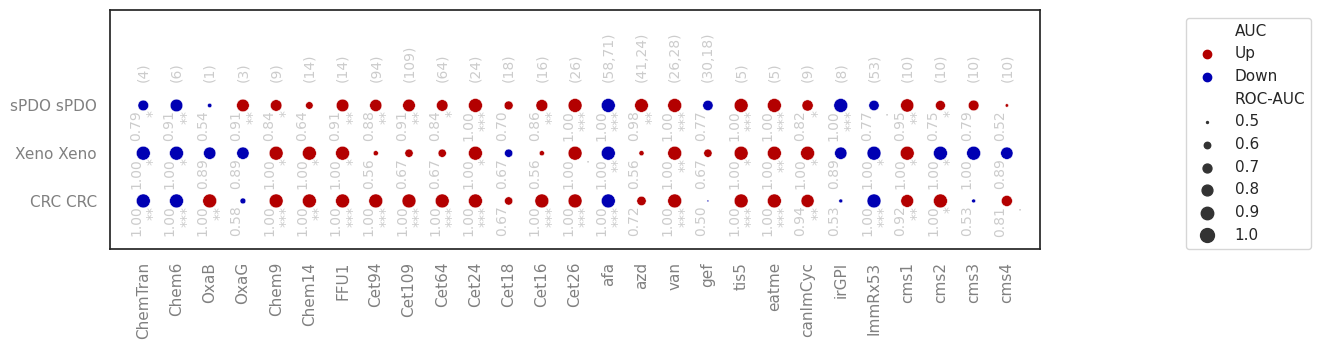

In [20]:
import Utils as ut
reload(ut)
import bone
reload(bone)
df = pd.read_csv("pgsig-res-1.txt", sep="\t", index_col=0)
res = np.array_split(df, df.shape[0]/27, axis=0)
pdf = bone.getPDF("pgsig-res-1.pdf")
df1 = df.pivot_table(values='ROC-AUC', index=df.index, columns='Condition', aggfunc='first')
#df1 = df1.applymap( lambda x: 1 - float(x.split(",")[0]) )
#df1 = df1.applymap( lambda x: x.split(",")[1])
df1['Avg'] = df1.apply(pd.to_numeric).mean(axis=1)
df1['Name'] = [df.iloc[k, df.columns.get_loc("Signature")] for k in df1.index]
df1 = df1.sort_values('Avg', ascending=False)
#ax = df1.plot.bar(x='Name', y='Avg', figsize=(2*37/9, 2))
#ax.set_ylim([0, 1.0])
ax.set_ylabel("Avg ROC-AUC")
#pdf.savefig(transparent=True,bbox_inches = 'tight')
df,ax,fig = ut.DP1(res)
pdf.savefig(transparent=True,bbox_inches = 'tight')
bone.closePDF(pdf)

In [21]:
def Comparison(ana, list1, desc='', Org='Hs'):
    def getL(l1):
        return '(' + ",".join([str(len(k)) for k in l1]) +')'

    res = []

    for k in list1:
        wt1, l1 = list1[k]
        ann = [desc,Org,k, getL(l1)]
        res += [ana.getStats(l1, wt1, ann)]

    cols = ['GSEID', 'ROC-AUC', 'pvalue', '#Cont', '#Expt',
            'Series', 'Species', 'Signature', '#Genes']
    df = pd.DataFrame(res, columns=cols)
    df['Condition'] = desc
    df['GSEID'] = desc
    return df
def ComparisonRes(list1):
    ana = CRCDiffAnalysis()
    res = []
    ana.getPG2021CRC(2) #HCT116
    res += [Comparison(ana, list1, desc="HCT116", Org='Hs')]
    ana.getPG2021CRC(2) #SW480
    res += [Comparison(ana, list1, desc="SW480", Org='Hs')]
    ana.getPG2021CRCxeno()
    res += [Comparison(ana, list1, desc="Xeno", Org='Hs')]
    ana.getPG2022PDO(5)
    res += [Comparison(ana, list1, desc="PDOs +/-PF", Org='Hs')]
    ana.getPG2022PDO(4)
    res += [Comparison(ana, list1, desc="PDOr +/-PF", Org='Hs')]
    ana.getPG2022PDO(6)
    res += [Comparison(ana, list1, desc="PDOh +/-PF", Org='Hs')]
    df = pd.concat(res, sort=True)
    return df
diff_g=['CDX2','PRKAB1','KRT20','TACSTD1', 'EPCAM','CA1',
        'CA2','SLC26A3', 'MS4A12', 'CEACAM1', 'CD177',
       'TFF3','MUC2', 'DLL1', 'SPDEF']
list2 = { 'CDX2':[[1], [['CDX2']]], 'Top+Goblet':[[1], [diff_g]], 
        'Cls2+3':[[1], [bone.getEntries("node-2.txt", 0) +
               bone.getEntries("node-3.txt", 0)]]}
df = ComparisonRes(list2)
df.to_csv("pgsig-res-2.txt", sep="\t")

HCT116 SW480 cells Human 2021 (n = 12)
 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG60
6 [3, 3]  http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG60 PG60
[1]
[18]
[52]
HCT116 SW480 cells Human 2021 (n = 12)
 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG60
6 [3, 3]  http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG60 PG60
[1]
[18]
[52]
August 2021 Hs samples (n = 18)
 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG20
6 [3, 3]  http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG20 PG20
[1]
[18]
[52]
Amer-Ghosh 2022 HS Project 1010940 7-15-22 84-105 (n = 39)
UCSD http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG132
15 [8, 7] UCSD http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG132 PG132
[1]
[18]
[52]
Amer-Ghosh 2022 HS Project 1010940 7-15-22 84-105 (n = 39)
UCSD http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG132
11 [6, 5] UCSD http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PG132 PG132
[1

In [26]:
import Utils as ut
reload(ut)
import bone
reload(bone)
df = pd.read_csv("pgsig-res-2.txt", sep="\t", index_col=0)
res = np.array_split(df, df.shape[0]/3, axis=0)
pdf = bone.getPDF("pgsig-res-2.pdf")
df1 = df.pivot_table(values='ROC-AUC', index=df.index, columns='Condition', aggfunc='first')
#df1 = df1.applymap( lambda x: 1 - float(x.split(",")[0]) )
#df1 = df1.applymap( lambda x: x.split(",")[1])
df1['Avg'] = df1.apply(pd.to_numeric).mean(axis=1)
df1['Name'] = [df.iloc[k, df.columns.get_loc("Signature")] for k in df1.index]
df1 = df1.sort_values('Avg', ascending=False)
#ax = df1.plot.bar(x='Name', y='Avg', figsize=(2*3/9, 2))
#ax.set_ylim([0, 1.0])
#ax.set_ylabel("Avg ROC-AUC")
pdf.savefig(transparent=True,bbox_inches = 'tight')
df,ax,fig = ut.DP1(res)
pdf.savefig(transparent=True,bbox_inches = 'tight')
bone.closePDF(pdf)

ValueError: No figure None